## 피마 인디언 당뇨병 예측

In [ ]:
피마 인디언 당뇨병 (Pima Indian Diabetes) 데이터 세트를 이용해 
당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고
지금까지 학습한 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가지표 적용

In [ ]:
피마 인디언 당뇨병 데이터 세트
- 북아메리카 피마 지역 원주민이 Type-2 당뇨병 결과 데이터
- 보통 당뇨 원인으로 식습관과 유전을 꼽음
- 피마 지역은 고립된 지역에서 인디언 고유의 활동이 지속돼 왔지만
- 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생
- 고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구 수행
- 

In [ ]:
https://www.kaggle.com/
회원가입하고 데이터 다운로드
https://www.kaggle.com/uniml/pima-indians-diabetes-database 데이터 다운로드
diabetes.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
diabetes_data=pd.read_csv('data/diabetes.csv')

In [6]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
print(diabetes_data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [8]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
#마지막 칼럼 Outcome : 레이블 값
#전체 768개 데이터 중에서
#0 Negative 값이 500개
#1 Positive 값이 268개
# Negative가 상대적으로 더 많음

피마 인디언 당뇨병 데이터 세트 피처
* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)


# 데이터 정보 확인

In [9]:
# 데이터 정보 확인
diabetes_data.info()

# Null 값 없고 모두 숫자
# 별도의 피처 인코딩 필요하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
로지스틱 회귀를 이용해 예측 모델 생성
- 데이터 세트를 피처 데이터와 클래스 데이터 세트로 나누고 
- 학습 데이터 세트와 테스트 세트로 분리
- 로지스틱 회귀를 이용해 예측 수행
- 성능 평가 지표 출력
- 재현율 곡선 시각화

In [ ]:
# 앞 예제에서 get_clf_eval()과 precisin_recall_curve_plot()에 추가해서 사용

In [17]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accuracy = accuracy_score(y_test, pred)    # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred)        # 재현율
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print("오차 행렬")
    print(confusion)
    
    # ROC-AUC 추가   
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('정확도 : {0:.4f}, 정밀도: {1:.4f}, 재현율 : {2:.4f},\
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [18]:
#임계값의 변화에 따른 정밀도-재현율 변환 곡선 시각화


# 임계값의 변화에 따른 정밀도-재현율 변환 곡선 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, prd_proba_class1)
    
    # X축을 thresholds 값, Y축은 정밀도, 재현율 값으로 각각 Plot 수행
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0] # (143, 0)에서 143 추출
    
    # thresholds는 143이고, precisions과 recalls는 144로 X축과 Y축 값의 개수 가 맞이 낳으므로
    # 이 precisions과 recalls 갓으로 그래프를 그리면 오류 발생
    # y 값을 [0:threshold_boundary]로 143개 추출해서 X축 개수와 맞춤
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')

    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scaledmf 0.1 단위로 변경
    # xlim() : X축 범위를 지정하거나 반환
    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

In [20]:
# LogisticRegression으로 학습/예측 수행

# 데이터 추출
# 피처 데이터 세트 : X
# 레이블 데이터 세트 : y
X = diabetes_data.iloc[:, :-1] # 슬라이싱 start에서 end -1까지
y = diabetes_data.iloc[:, -1]   # 인덱싱 : 마지막 칼럼

# 학습 데이터 세트와 테스트 데이터 세트로 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 예측 확률 
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


# 결과
# 예측 정확도가 77.27%, 재현율이 59.26%로 측정
# 전체 데이터가 약 65% (500개)가 Negative이므로 
# 정확도보다는 재현율을 성능에 조금 더 초점을 맞춰 조정할 것임


오차 행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도: 0.7111, 재현율 : 0.5926,    F1 : 0.6465, AUC:0.8083


피마 인디언 당뇨병 데이터 세트
- 전체 768개 중에서 1이 268개 : 34.89 %  
  
- stratify=y로 설정한 경우 (비율 거의 유사)
    - 학습 데이터 세트 에서 1의 비율 : 34.85 %
    - 데스트 데이터 세트에서 1의 비율 : 35.06%  
      
- stratify=y로 설정하지 않은 경우 (비율 차이가 있음)
    - 학습 데이터 세트 에서 1의 비율 : 34.36 %
    - 데스트 데이터 세트에서 1의 비율 : 37.01 %  

### 재현율 성능에 조금 더 초점을 맞춰 조정

In [ ]:
먼저, 정밀도와 재현율 곡선을 확인하고 
임계값 별로 정밀도와 재현율 값의 변화 확인 

In [ ]:
# precision_recall_curve_plot(실제값, 예측 확률)
prd_proba=lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, prd_proba)

# 결과
# 재현율 곡선 : 임계값을 0.42 정도로 낮추면
# 정밀도와 재현율이 어느 정도 균형을 맞출 것 같지만
# 정밀도와 재현율 두 개 지표 모두 0.7이 안 되는 수치로 값이 낮음.
# 임계값을 조정하기 전에 다시 데이터 값 점검 

### 각 피처들의 값 분포 확인


In [26]:
diabetes_data.describe()


# min 값이 0인 피처가 많이 존재 
# Glucose(포도당), BloodPressure(혈압), SkinThickness(팔 뒤쪽 피하지방)
# Insulin, BMI(체질량지수) 피처들이 0이 나올 수 없는데 0으로 되어 있음
# ㅡ> 전처리(가공) 작업 필요

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

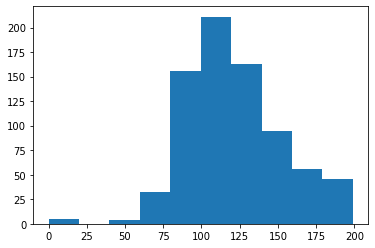

In [28]:
# Glucose(포도당) 피처의 히스토그램 확인
plt.hist(diabetes_data['Glucose'], bins=10)
# 0값이 일정 수준 존재 확인

In [ ]:
# 0값이 있는 피처들에서 0값의 데이터 건수화 퍼센트 계산 
- 0값의 데이터 건수
- 전체 데이터 건수 대비 몇 퍼센트의 비율인지 확인 

In [31]:
# 0값을 검사할 피처명 리스트 생성
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

# 0 값이 상당히 많음
# 전체 데이터 건수가 많지 않기 때문에 
# 0값인 데이터를 삭제할 경우에 
# 학습을 효과적으로 수행하기 어려울 것 같으므로
# 0값을 평균값으로 대체


Glucose 0건수는 5, 퍼센트 0.65 %
BloodPressure 0건수는 35, 퍼센트 4.56 %
SkinThickness 0건수는 227, 퍼센트 29.56 %
Insulin 0건수는 374, 퍼센트 48.70 %
BMI 0건수는 11, 퍼센트 1.43 %


In [ ]:
StandardScaler 클래스를 이용해서 피처 데이터 세트에 일괄적으로 스케일링 적용하고 
0값을 평균으로 대체한 데이터 세트로 학습/예측 수행

In [32]:
# LogisticRegression으로 학습/예측 수행

# 데이터 추출
# 피처 데이터 세트 : X
# 레이블 데이터 세트 : y
X = diabetes_data.iloc[:, :-1] # 슬라이싱 start에서 end -1까지
y = diabetes_data.iloc[:, -1]   # 인덱싱 : 마지막 칼럼


# StandardScaler 클래스를 이용해서 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


# 학습 데이터 세트와 테스트 데이터 세트로 분리

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 예측 확률 
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)


# 결과
# 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선됨
# 그러나 재현율 수치는 여전히 개선이 필요해 보임

오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도: 0.7674, 재현율 : 0.6111,    F1 : 0.6804, AUC:0.8059


In [ ]:
오차 행렬
[[87 13]
 [22 32]]
정확도 : 0.7727, 정밀도: 0.7111, 재현율 : 0.5926,    F1 : 0.6465, AUC:0.8083

In [34]:
# 임계값에 따른 평가 수치를 출력하는 함수 
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds 리스트 값을 차례로 반복하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        
        print('\n임계값 : ', custom_threshold)
        
        #위에서 만든 평가 함수 호출
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [36]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# 정확도와 정밀도를 희생하고 재현율을 높이는데 가장 좋은 임계값 0.3
# 재현율 값 : 0.7593
# 그러나 정밀도가 0.5616으로 매우 낮음
# 극단적인 선택으로 보임

# 임계값 : 0.45나 0.48하면 될것같다고 강사님이 말함
# 임계값 : 0.45 또는 0.48일 경우
# 정확도 : 0.7727, 정밀도: 0.6939, 재현율 : 0.6296
# 전체적인 성능 평가 지표를 유지하면서
# 재현율을 약간 향상시키는 적당한 임계값으로 보임


임계값 :  0.3
오차 행렬
[[68 32]
 [13 41]]
정확도 : 0.7078, 정밀도: 0.5616, 재현율 : 0.7593,    F1 : 0.6457, AUC:0.8059

임계값 :  0.33
오차 행렬
[[74 26]
 [15 39]]
정확도 : 0.7338, 정밀도: 0.6000, 재현율 : 0.7222,    F1 : 0.6555, AUC:0.8059

임계값 :  0.36
오차 행렬
[[76 24]
 [18 36]]
정확도 : 0.7273, 정밀도: 0.6000, 재현율 : 0.6667,    F1 : 0.6316, AUC:0.8059

임계값 :  0.39
오차 행렬
[[79 21]
 [19 35]]
정확도 : 0.7403, 정밀도: 0.6250, 재현율 : 0.6481,    F1 : 0.6364, AUC:0.8059

임계값 :  0.42
오차 행렬
[[81 19]
 [20 34]]
정확도 : 0.7468, 정밀도: 0.6415, 재현율 : 0.6296,    F1 : 0.6355, AUC:0.8059

임계값 :  0.45
오차 행렬
[[85 15]
 [20 34]]
정확도 : 0.7727, 정밀도: 0.6939, 재현율 : 0.6296,    F1 : 0.6602, AUC:0.8059

임계값 :  0.48
오차 행렬
[[88 12]
 [21 33]]
정확도 : 0.7857, 정밀도: 0.7333, 재현율 : 0.6111,    F1 : 0.6667, AUC:0.8059

임계값 :  0.5
오차 행렬
[[90 10]
 [21 33]]
정확도 : 0.7987, 정밀도: 0.7674, 재현율 : 0.6111,    F1 : 0.6804, AUC:0.8059
